In [4]:
# spectral analysis II.
import numpy as np
import matplotlib.pyplot as plt

--2025-08-25 20:32:27--  https://www.fit.vutbr.cz/study/courses/ISS/public/NEW_PRED/02_spectral_analysis_1/prase.wav
Resolving www.fit.vutbr.cz (www.fit.vutbr.cz)... 147.229.9.23, 2001:67c:1220:809::93e5:917
Connecting to www.fit.vutbr.cz (www.fit.vutbr.cz)|147.229.9.23|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.fit.vut.cz/study/courses/ISS/public/NEW_PRED/02_spectral_analysis_1/prase.wav [following]
--2025-08-25 20:32:28--  https://www.fit.vut.cz/study/courses/ISS/public/NEW_PRED/02_spectral_analysis_1/prase.wav
Resolving www.fit.vut.cz (www.fit.vut.cz)... 147.229.9.65, 2001:67c:1220:809::93e5:941
Connecting to www.fit.vut.cz (www.fit.vut.cz)|147.229.9.65|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.fit.vut.cz/study/course/ISS/public/NEW_PRED/02_spectral_analysis_1/prase.wav [following]
--2025-08-25 20:32:30--  https://www.fit.vut.cz/study/course/ISS/public/NEW_PRED/02

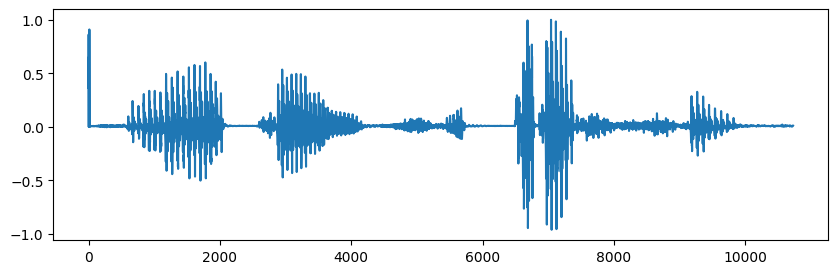

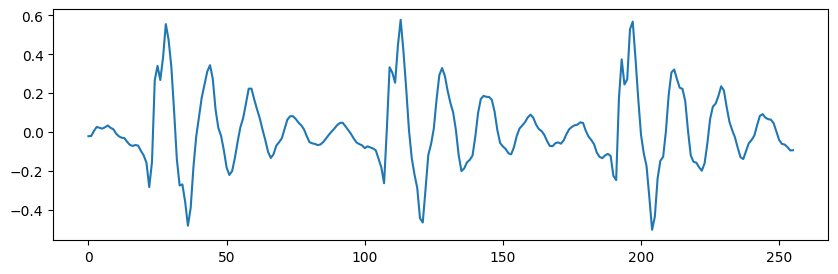

In [5]:
import soundfile as sf
from IPython.display import Audio
!wget https://www.fit.vutbr.cz/study/courses/ISS/public/NEW_PRED/02_spectral_analysis_1/prase.wav
# >>>>>>>>>>>>>>>>> #dft_anal <<<<<<<<<<<<<<<<<<<<<<<<<
s, Fs = sf.read('prase.wav')
display(Audio(s, rate=Fs))
plt.figure(figsize=(10,3))
plt.plot(s)
N = 256
n = np.arange(0,N)
x = s[1500:1500+N]
display(Audio(x, rate=Fs))
plt.figure(figsize=(10,3))
plt.plot(n,x)


Text(0, 0.5, 'arg $X[k]$')

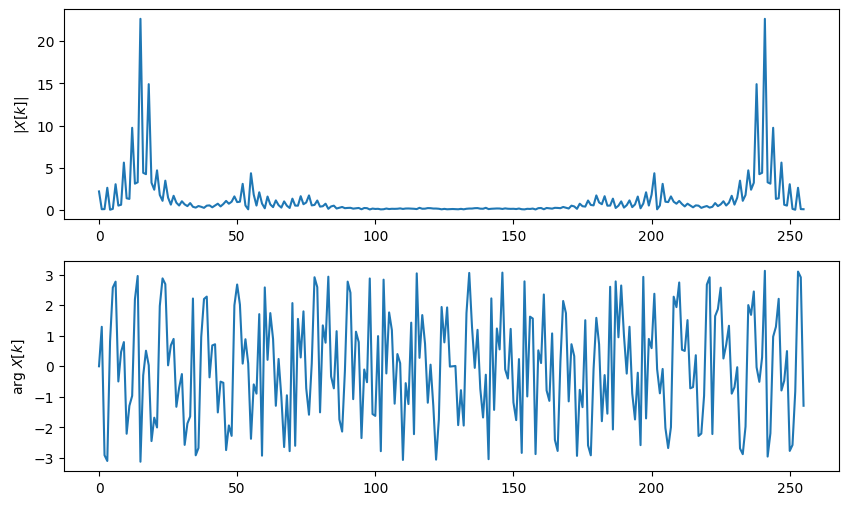

In [6]:
# do the fft here ...
X = np.fft.fft(x)
kall = np.arange(0,N) # here we run till N-1 !
Xmag = np.abs(X)
Xphase = np.angle(X)

_, ax = plt.subplots(2,1, figsize=(10,6))
ax[0].plot(kall,Xmag)
ax[0].set_ylabel('$|X[k]|$')
ax[1].plot(kall,Xphase)
ax[1].set_ylabel('arg $X[k]$')

Text(0, 0.5, 'arg $X[k]$')

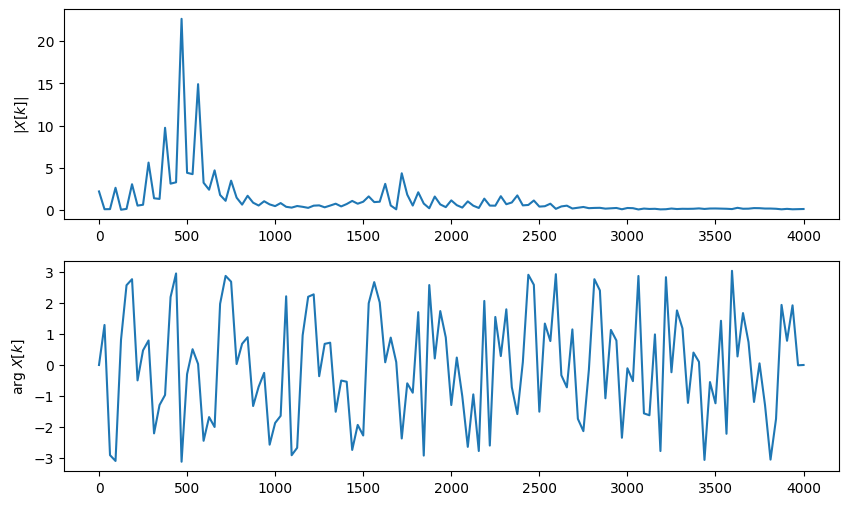

In [7]:
# only half of spectrum
kall = np.arange(0,int(N/2) +1)
Xmag = np.abs(X[kall])
Xphase = np.angle(X[kall])
f = kall / N * Fs
_, ax = plt.subplots(2,1, figsize=(10,6))
ax[0].plot(f,Xmag)
ax[0].set_ylabel('$|X[k]|$')
ax[1].plot(f,Xphase)
ax[1].set_ylabel('arg $X[k]$')


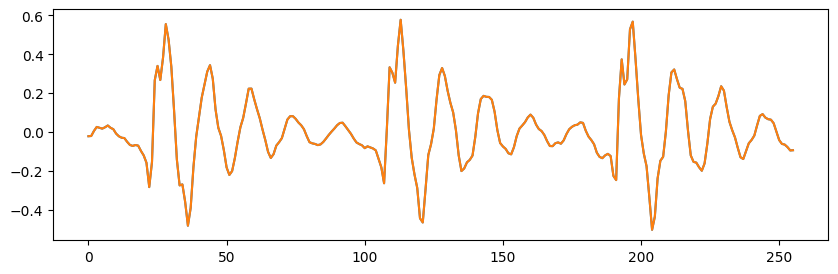

In [8]:
# >>>>>>>>>>>>>>>>> #dft_synt <<<<<<<<<<<<<<<<<<<<<<<<<
xs = np.fft.ifft(X)
xs = np.real(xs)  # because of numerical computation ...
plt.figure(figsize=(10,3)) # when plotting, needs normalization ...
plt.plot(n,x)
plt.plot(n,xs)
display(Audio(x, rate=Fs))
display(Audio(xs, rate=Fs))


Text(0, 0.5, 'arg $X[k]$')

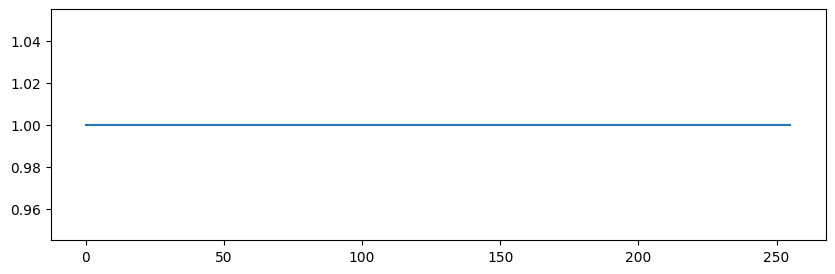

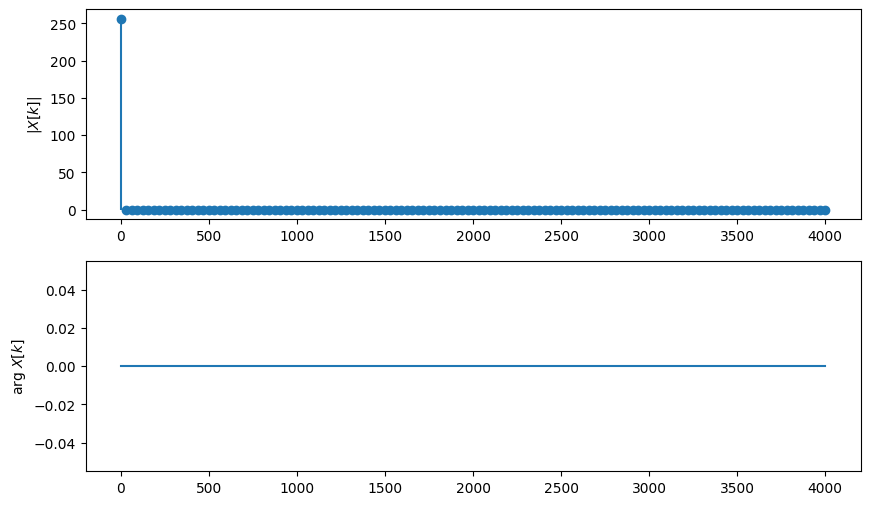

In [10]:
# >>>>>>>>>>>>>>>>> #dft_of_constant <<<<<<<<<<<<<<<<<<<<<<<<<
x = np.ones(N)
X = np.fft.fft(x)
plt.figure(figsize=(10,3))
plt.plot(n,x)
_, ax = plt.subplots(2,1, figsize=(10,6))
ax[0].stem(f,np.abs(X[kall]),basefmt=" ") #, use_line_collection="true")
ax[0].set_ylabel('$|X[k]|$')
ax[1].plot(f,np.angle(X[kall]))
ax[1].set_ylabel('arg $X[k]$')

Text(0, 0.5, 'arg $X[k]$')

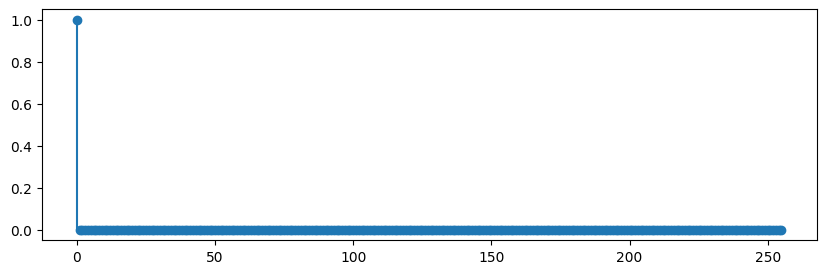

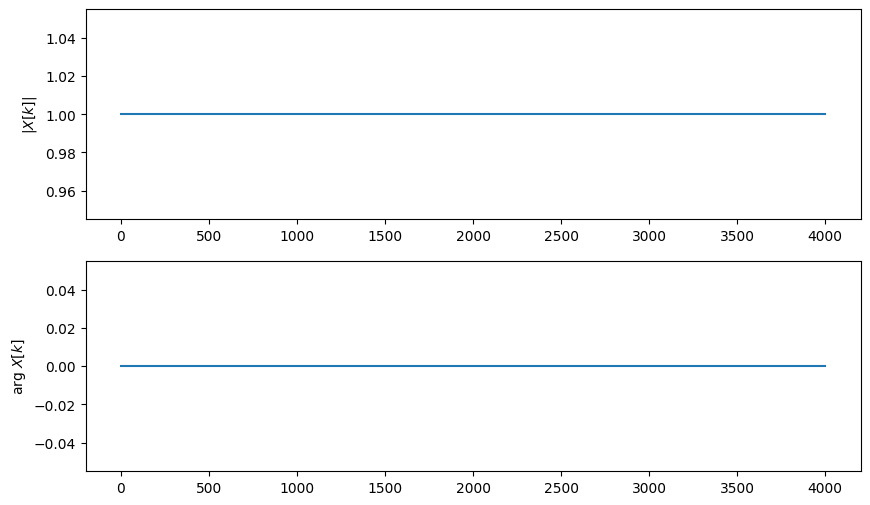

In [13]:
# >>>>>>>>>>>>>>>>> #dft_of_pulse <<<<<<<<<<<<<<<<<<<<<<<<<
x = np.zeros(N)
x[0] = 1
X = np.fft.fft(x)
plt.figure(figsize=(10,3))
plt.stem(n,x,basefmt=" ") #, use_line_collection="true")
_, ax = plt.subplots(2,1, figsize=(10,6))
ax[0].plot(f,np.abs(X[kall]))
ax[0].set_ylabel('$|X[k]|$')
ax[1].plot(f,np.angle(X[kall]))
ax[1].set_ylabel('arg $X[k]$')

Text(0, 0.5, 'arg $X[k]$ unwrapped')

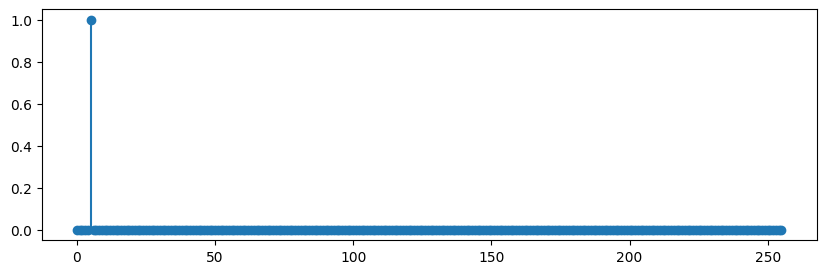

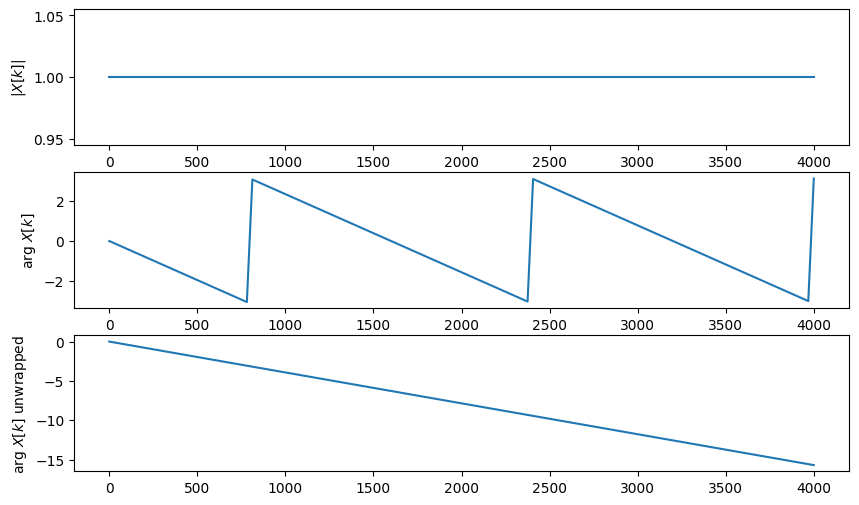

In [14]:
# >>>>>>>>>>>>>>>>> #dft_of_shifted_pulse <<<<<<<<<<<<<<<<<<<<<<<<<
N = 256
x = np.zeros(N)
g = 5  # <--------------- set the pulse position here
x[g] = 1
X = np.fft.fft(x)
plt.figure(figsize=(10,3))
plt.stem(n,x,basefmt=" ") #, use_line_collection="true")
_, ax = plt.subplots(3,1, figsize=(10,6))
ax[0].plot(f,np.abs(X[kall]))
ax[0].set_ylabel('$|X[k]|$')
ax[1].plot(f,np.angle(X[kall]))
ax[1].set_ylabel('arg $X[k]$')
ax[2].plot(f,np.unwrap(np.angle(X[kall])))
ax[2].set_ylabel('arg $X[k]$ unwrapped')

Text(0, 0.5, 'arg $X[k]$ unwrapped')

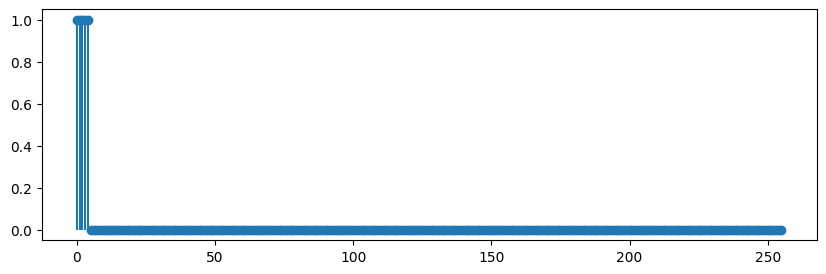

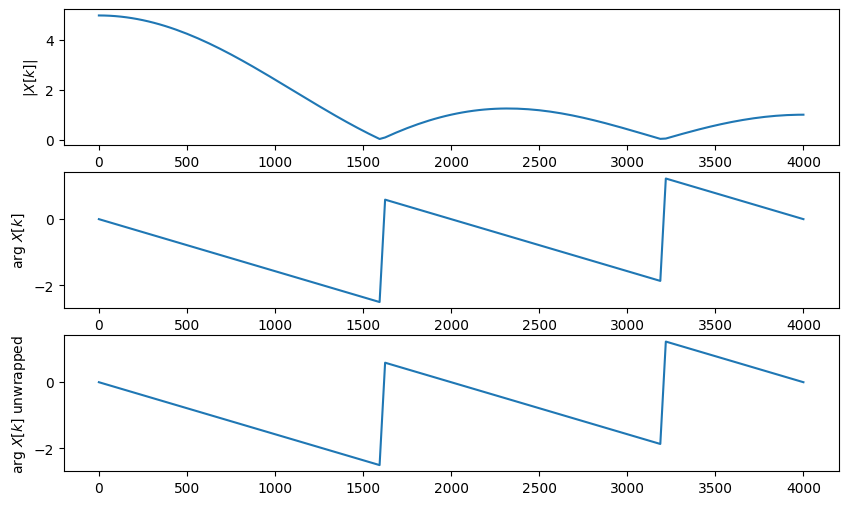

In [15]:
# >>>>>>>>>>>>>>>>> #dft_of_rectangle <<<<<<<<<<<<<<<<<<<<<<<<<
N= 256
kall = np.arange(0,int(N/2) +1)
x = np.zeros(N)
g = 5  # <--------------- set the rectangle width here
x[0:g] = 1
X = np.fft.fft(x)
plt.figure(figsize=(10,3))
plt.stem(n,x,basefmt=" ") #, use_line_collection="true")
_, ax = plt.subplots(3,1, figsize=(10,6))
ax[0].plot(f,np.abs(X[kall]))
ax[0].set_ylabel('$|X[k]|$')
ax[1].plot(f,np.angle(X[kall]))
ax[1].set_ylabel('arg $X[k]$')
ax[2].plot(f,np.unwrap(np.angle(X[kall])))
ax[2].set_ylabel('arg $X[k]$ unwrapped')

Text(0, 0.5, 'arg $X[k]$ unwrapped')

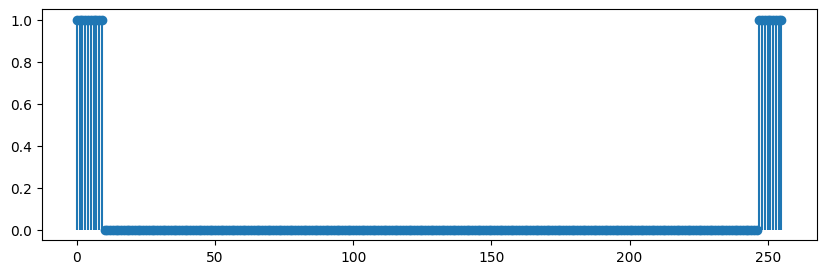

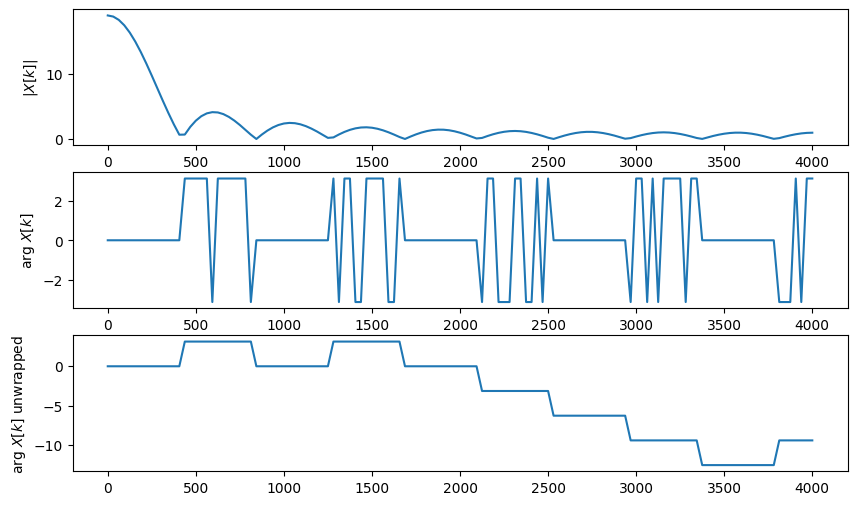

In [16]:
# >>>>>>>>>>>>>>>>> #dft_of_symmetrical_rectangle <<<<<<<<<<<<<<<<<<<<<<<<<
x = np.zeros(N)
g = 19  # <--------------- set the rectangle width here, must be ODD !!!!
x[0:g//2+1] = 1
x[N-g//2:] = 1
#print(x)
X = np.fft.fft(x)
plt.figure(figsize=(10,3))
plt.stem(n,x,basefmt=" ") # , use_line_collection="true")
_, ax = plt.subplots(3,1, figsize=(10,6))
ax[0].plot(f,np.abs(X[kall]))
ax[0].set_ylabel('$|X[k]|$')
ax[1].plot(f,np.angle(X[kall]))
ax[1].set_ylabel('arg $X[k]$')
ax[2].plot(f,np.unwrap(np.angle(X[kall])))
ax[2].set_ylabel('arg $X[k]$ unwrapped')

Text(0, 0.5, 'arg $X[k]$')

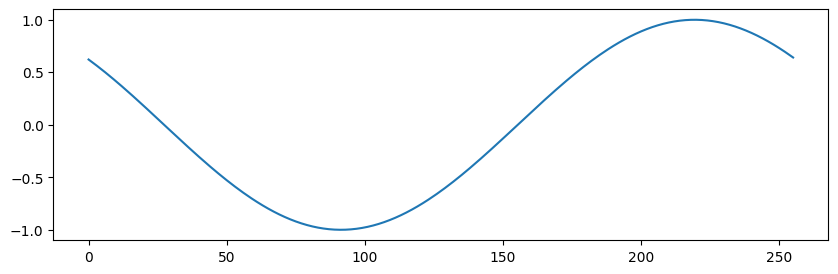

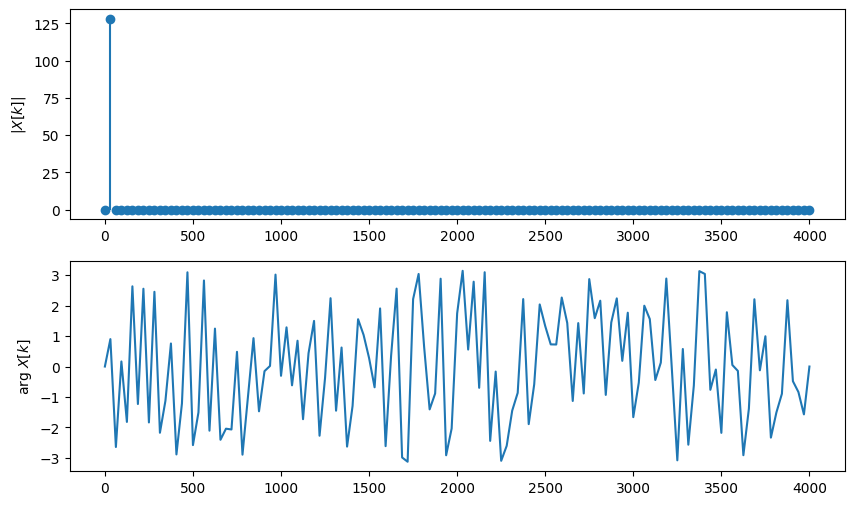

In [17]:
# >>>>>>>>>>>>>>>>> #dft_of_cos1 <<<<<<<<<<<<<<<<<<<<<<<<<
phase = +0.9 # *np.pi # <--- set phase here
x = np.cos(2 * np.pi * 1 / N * n + phase)
X = np.fft.fft(x)
plt.figure(figsize=(10,3))
plt.plot(n,x)
_, ax = plt.subplots(2,1, figsize=(10,6))
ax[0].stem(f,np.abs(X[kall]),basefmt=" ") # , use_line_collection="true")
ax[0].set_ylabel('$|X[k]|$')
ax[1].plot(f,np.angle(X[kall]))
ax[1].set_ylabel('arg $X[k]$')


Text(0, 0.5, 'arg $X[k]$')

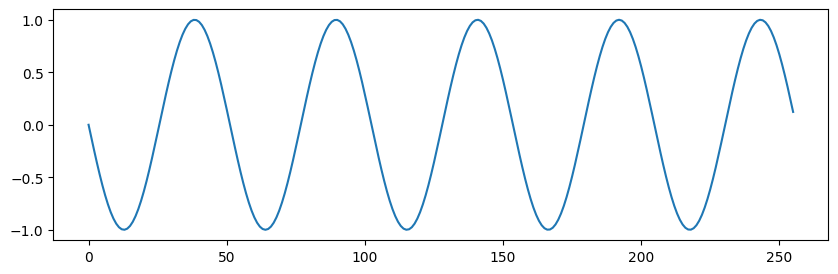

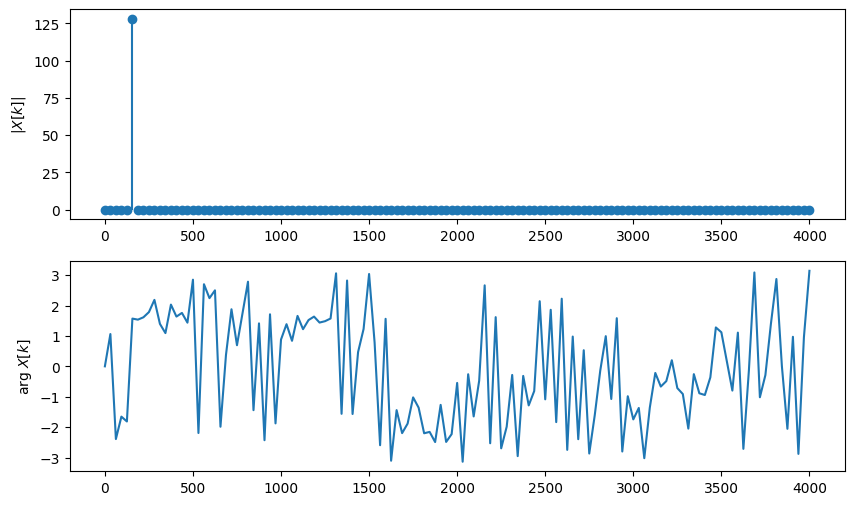

In [18]:
# >>>>>>>>>>>>>>>>> #dft_of_cos_multiperiod <<<<<<<<<<<<<<<<<<<<<<<<<
phase = np.pi / 2 # <--- set phase here
g = 5             # <--- set no of periods here.
x = np.cos(2 * np.pi * g / N * n + phase)
X = np.fft.fft(x)
plt.figure(figsize=(10,3))
plt.plot(n,x)
_, ax = plt.subplots(2,1, figsize=(10,6))
ax[0].stem(f,np.abs(X[kall]),basefmt=" ") # , use_line_collection="true")
ax[0].set_ylabel('$|X[k]|$')
ax[1].plot(f,np.angle(X[kall]))
ax[1].set_ylabel('arg $X[k]$')


period =  100.0


Text(0, 0.5, 'arg $X[k]$')

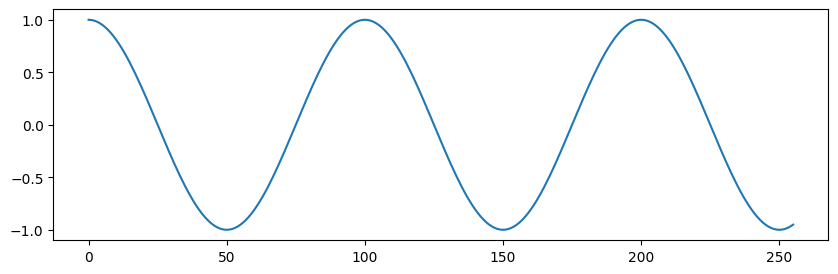

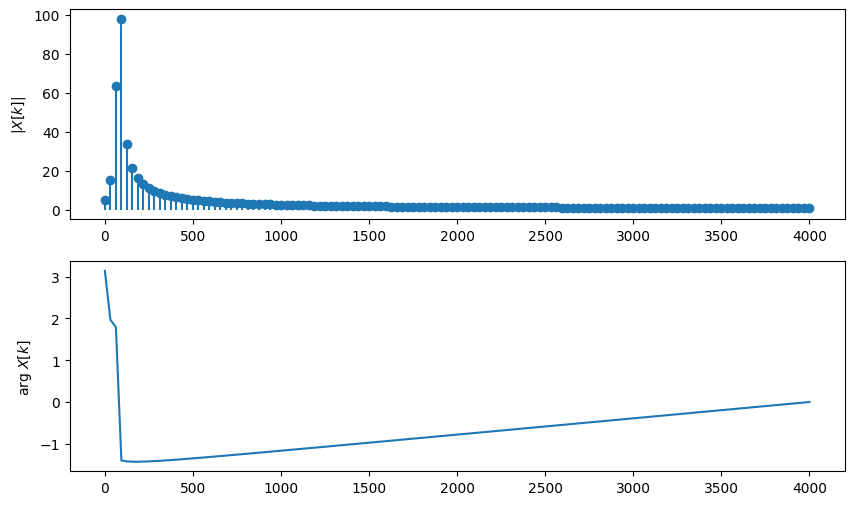

In [19]:
# >>>>>>>>>>>>>>>>> #dft_of_generalcos <<<<<<<<<<<<<<<<<<<<<<<<<
normfreq = 0.01
print("period = ", 1 / normfreq)
x = np.cos(2 * np.pi * normfreq * n) # zero phase for simplicity
X = np.fft.fft(x)
plt.figure(figsize=(10,3))
plt.plot(n,x)
_, ax = plt.subplots(2,1, figsize=(10,6))
ax[0].stem(f,np.abs(X[kall]),basefmt=" ") #, use_line_collection="true")
ax[0].set_ylabel('$|X[k]|$')
ax[1].plot(f,np.angle(X[kall]))
ax[1].set_ylabel('arg $X[k]$')


<StemContainer object of 3 artists>

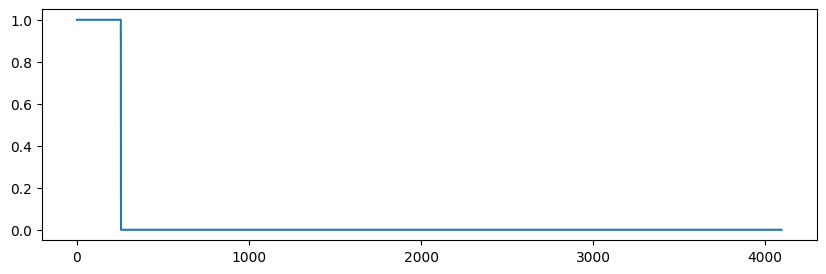

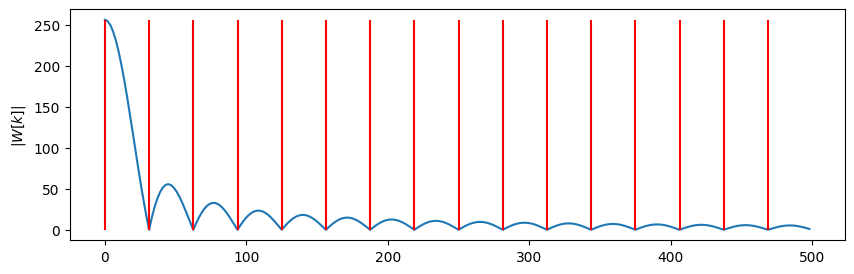

In [21]:
# >>>>>>>>>>>>>>>>> #dft_rectangle_zeropad  <<<<<<<<<<<<<<<<<<<<<<<<<
N = 256
Nfft = 4096
Flimit = 500
w = np.ones(N)
wpad = np.pad(w, (0, Nfft - N), 'constant', constant_values=0)
plt.figure(figsize=(10,3))
plt.plot(wpad)
Wpad = np.fft.fft(wpad)
klimited = np.arange(0,int(Flimit/Fs*Nfft))    # wants 0...500 Hz, this is 256 / 16 * 16 = again 256
flimited = klimited / Nfft * Fs
foriginal = f[f < Flimit]
plt.figure(figsize=(10,3))
plt.plot(flimited,np.abs(Wpad[klimited]))
plt.gca().set_ylabel('$|W[k]|$')
plt.stem(foriginal,np.ones(np.size(foriginal))*np.max(np.abs(Wpad[klimited])),basefmt=" ",linefmt="r-",markerfmt=" ") # use_line_collection="false",


<StemContainer object of 3 artists>

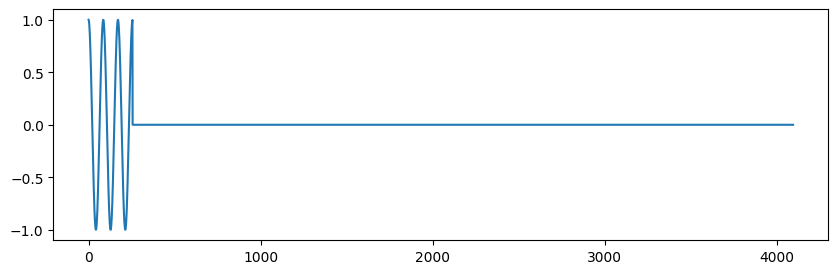

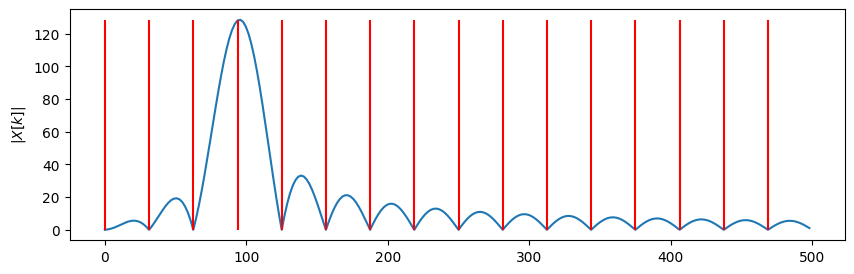

In [22]:
# >>>>>>>>>>>>>>>>> #dft_of_cos_multiperiod_detail <<<<<<<<<<<<<<<<<<<<<<<<<
g = 3             # <--- set no of periods here.
x = np.cos(2 * np.pi * g / N * n )
xpad = np.pad(x, (0, Nfft - N), 'constant', constant_values=0)
plt.figure(figsize=(10,3))
plt.plot(xpad)
Xpad = np.fft.fft(xpad)
klimited = np.arange(0,int(Flimit/Fs*Nfft))    # wants 0...500 Hz, this is 256 / 16 * 16 = again 256
flimited = klimited / Nfft * Fs
foriginal = f[f < Flimit]
plt.figure(figsize=(10,3))
plt.plot(flimited,np.abs(Xpad[klimited]))
plt.gca().set_ylabel('$|X[k]|$')
plt.stem(foriginal,np.ones(np.size(foriginal))*np.max(np.abs(Xpad[klimited])),basefmt=" ",linefmt="r-",markerfmt=" ") # use_line_collection="false",


period =  100.0


<StemContainer object of 3 artists>

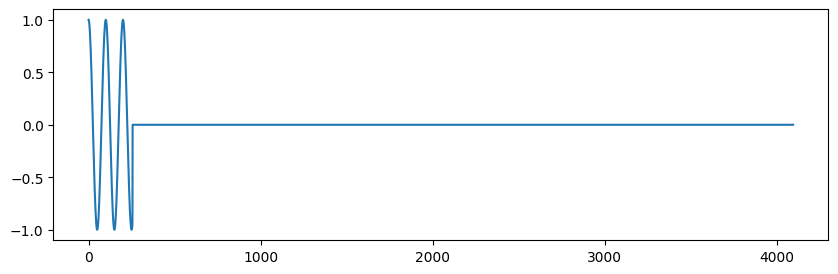

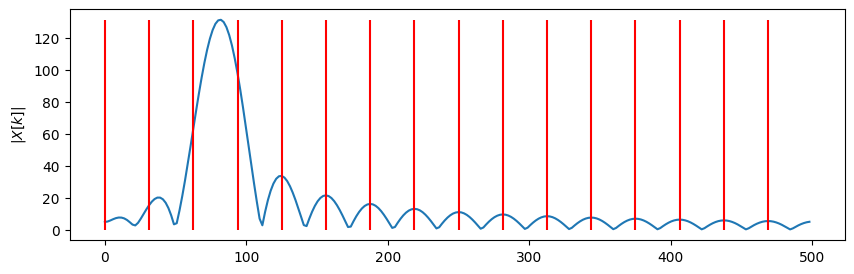

In [23]:
# >>>>>>>>>>>>>>>>> #dft_of_generalcos_detail <<<<<<<<<<<<<<<<<<<<<<<<<
normfreq = 0.01
print("period = ", 1 / normfreq)
x = np.cos(2 * np.pi * normfreq * n) # zero phase for simplicity
xpad = np.pad(x, (0, Nfft - N), 'constant', constant_values=0)
plt.figure(figsize=(10,3))
plt.plot(xpad)
Xpad = np.fft.fft(xpad)
klimited = np.arange(0,int(Flimit/Fs*Nfft))    # wants 0...500 Hz, this is 256 / 16 * 16 = again 256
flimited = klimited / Nfft * Fs
foriginal = f[f < Flimit]
plt.figure(figsize=(10,3))
plt.plot(flimited,np.abs(Xpad[klimited]))
plt.gca().set_ylabel('$|X[k]|$')
plt.stem(foriginal,np.ones(np.size(foriginal))*np.max(np.abs(Xpad[klimited])),basefmt=" ",linefmt="r-",markerfmt=" ") # use_line_collection="false",


period =  100.0


<StemContainer object of 3 artists>

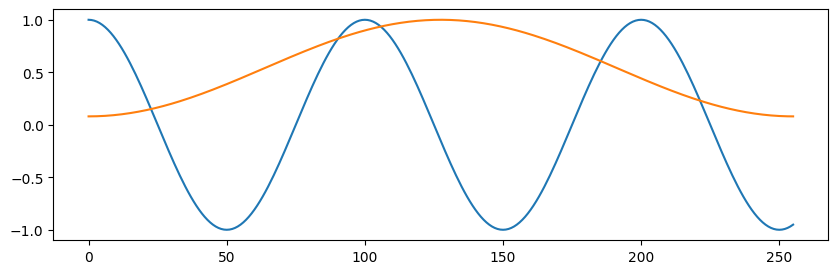

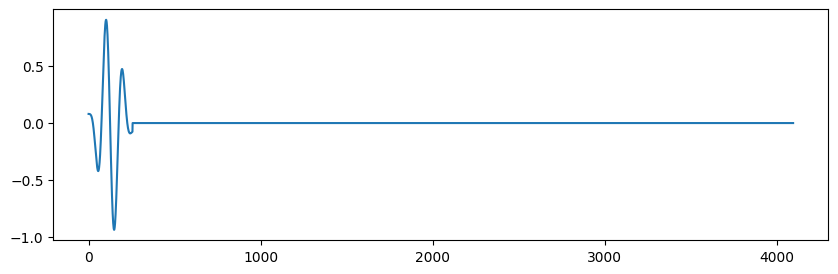

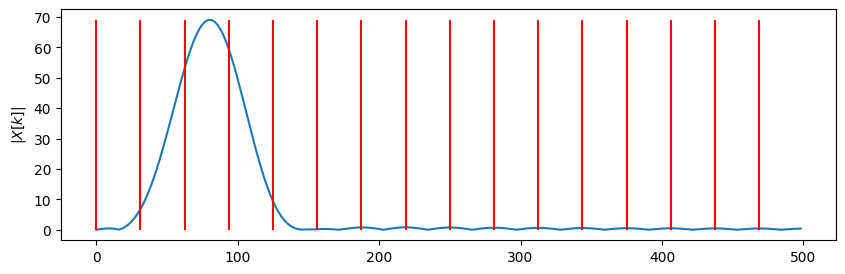

In [24]:
# >>>>>>>>>>>>>>>>> #dft_of_generalcos_Hamming <<<<<<<<<<<<<<<<<<<<<<<<<
normfreq = 0.01
print("period = ", 1 / normfreq)
x = np.cos(2 * np.pi * normfreq * n) # zero phase for simplicity
w = np.hamming(N)
xw = x * w
xpad = np.pad(xw, (0, Nfft - N), 'constant', constant_values=0)
plt.figure(figsize=(10,3))
plt.plot(x)
plt.plot(w)
plt.figure(figsize=(10,3))
plt.plot(xpad)
Xpad = np.fft.fft(xpad)
klimited = np.arange(0,int(Flimit/Fs*Nfft))    # wants 0...500 Hz, this is 256 / 16 * 16 = again 256
flimited = klimited / Nfft * Fs
foriginal = f[f < Flimit]
plt.figure(figsize=(10,3))
plt.plot(flimited,np.abs(Xpad[klimited]))
plt.gca().set_ylabel('$|X[k]|$')
plt.stem(foriginal,np.ones(np.size(foriginal))*np.max(np.abs(Xpad[klimited])),basefmt=" ",linefmt="r-",markerfmt=" ") # use_line_collection="false",


Text(0, 0.5, 'arg $X[k]$')

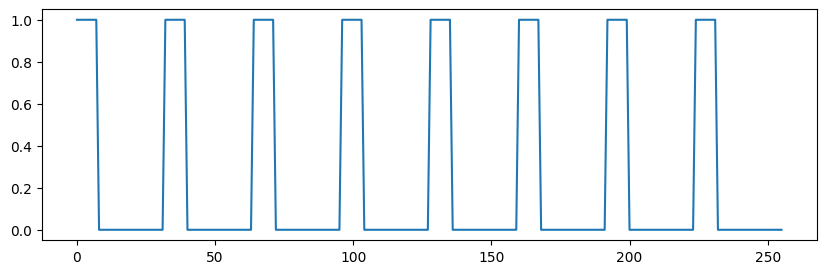

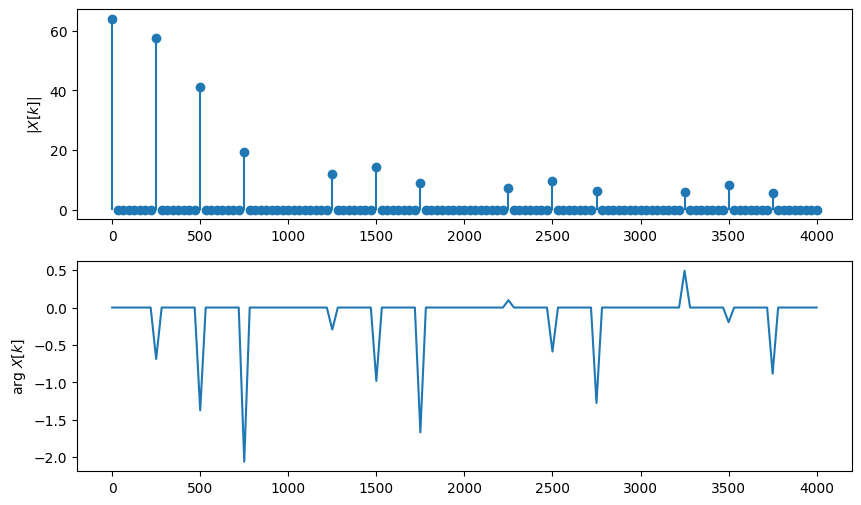

In [25]:
# >>>>>>>>>>>>>>>>> #dft_pulsetrain <<<<<<<<<<<<<<<<<<<<<<<<<
N = 256
Npulse = 32   # must be fraction of 256
pulselen = 8
onepulse = np.concatenate((np.ones(pulselen), np.zeros(Npulse-pulselen)))
#print(onepulse)
x = np.tile(onepulse, N // Npulse)
plt.figure(figsize=(10,3))
plt.plot(n,x)
X = np.fft.fft(x)
_, ax = plt.subplots(2,1, figsize=(10,6))
ax[0].stem(f,np.abs(X[kall]),basefmt=" ") #, use_line_collection="true")
ax[0].set_ylabel('$|X[k]|$')
ax[1].plot(f,np.angle(X[kall]))
ax[1].set_ylabel('arg $X[k]$')


Text(0, 0.5, 'arg $X[k]$')

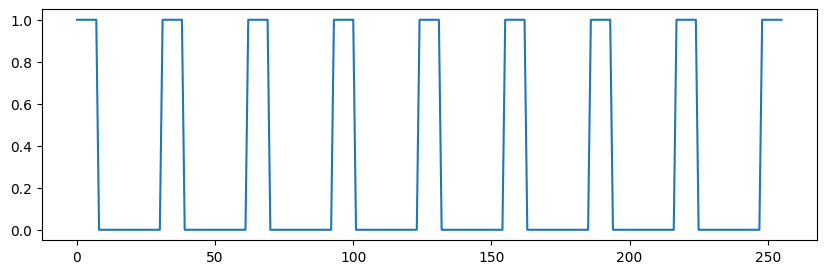

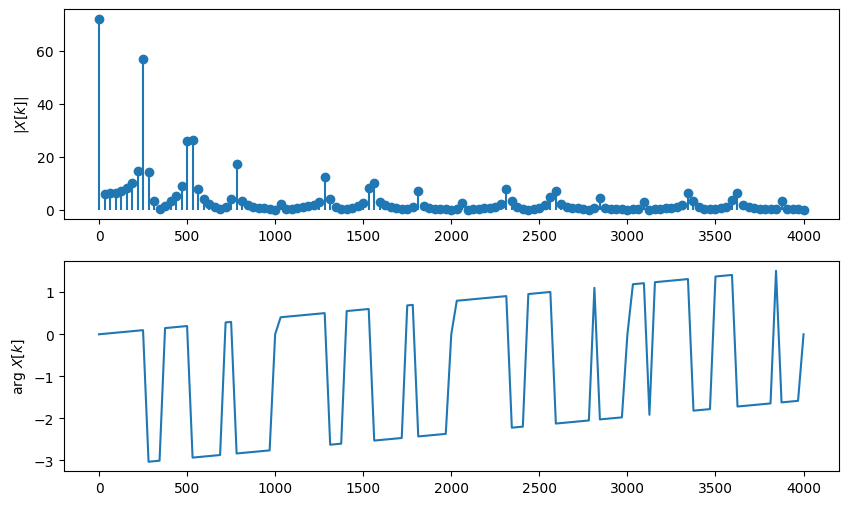

In [26]:
# >>>>>>>>>>>>>>>>> #dft_pulsetrain_general <<<<<<<<<<<<<<<<<<<<<<<<<
N = 256
Npulse = 31   # not a  fraction of 256
pulselen = 8
onepulse = np.concatenate((np.ones(pulselen), np.zeros(Npulse-pulselen)))
#print(onepulse)
x = np.tile(onepulse, N // Npulse + 1)
x = x[0:N]
plt.figure(figsize=(10,3))
plt.plot(n,x)
X = np.fft.fft(x)
_, ax = plt.subplots(2,1, figsize=(10,6))
ax[0].stem(f,np.abs(X[kall]),basefmt=" ") # , use_line_collection="true")
ax[0].set_ylabel('$|X[k]|$')
ax[1].plot(f,np.angle(X[kall]))
ax[1].set_ylabel('arg $X[k]$')


Text(0, 0.5, 'arg $X[k]$')

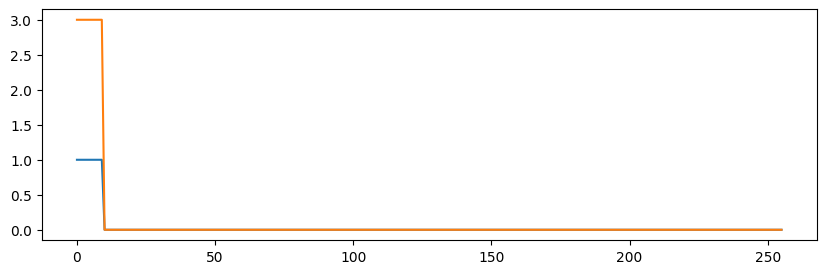

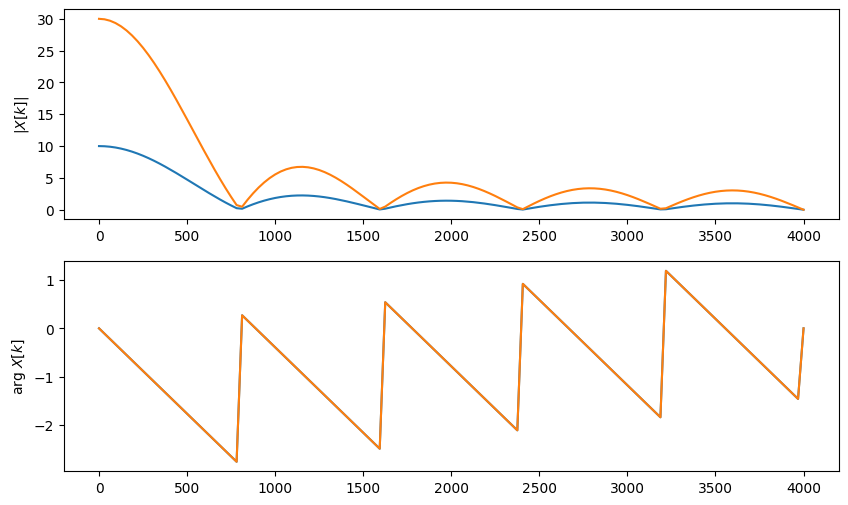

In [27]:
# -------------------------------- properties of DFT ----------------------------------------------
# >>>>>>>>>>>>>>>>> #dft_scaling <<<<<<<<<<<<<<<<<<<<<<<<<
x = np.zeros(N)
x[0:10] = 1
y = 3 * x
X = np.fft.fft(x)
Y = np.fft.fft(y)
plt.figure(figsize=(10,3))
plt.plot(n,x)
plt.plot(n,y)
_, ax = plt.subplots(2,1, figsize=(10,6))
ax[0].plot(f,np.abs(X[kall]))
ax[0].plot(f,np.abs(Y[kall]))
ax[0].set_ylabel('$|X[k]|$')
ax[1].plot(f,np.angle(X[kall]))
ax[1].plot(f,np.angle(Y[kall]))
ax[1].set_ylabel('arg $X[k]$')

Text(0, 0.5, 'arg $Y[k]$, arg $X_1[k]+X_2[k]$')

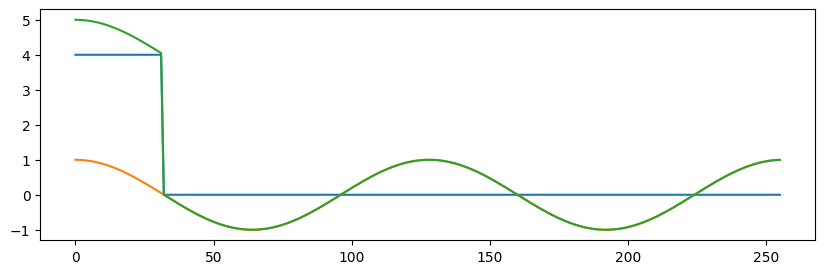

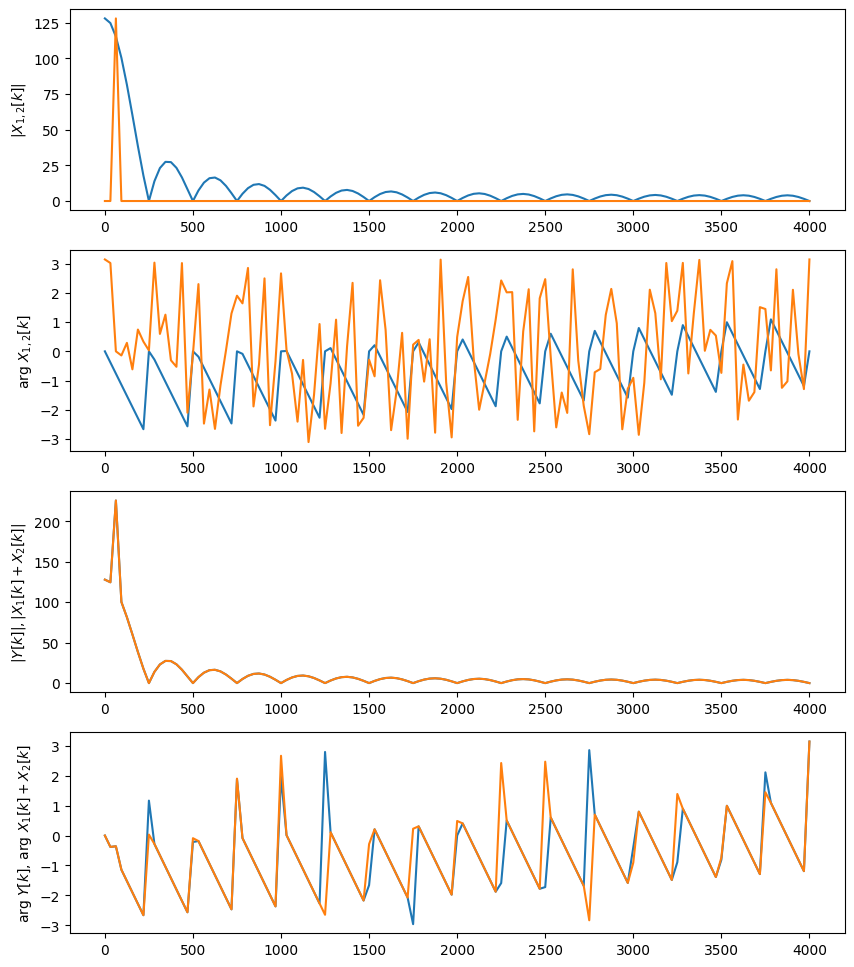

In [28]:
# >>>>>>>>>>>>>>>>> #dft_additivity <<<<<<<<<<<<<<<<<<<<<<<<<
x1 = np.zeros(N)
x1[0:32] = 4
x2 = np.cos (2 * np.pi * 2 / N * n)
y = x1 + x2
X1 = np.fft.fft(x1)
X2 = np.fft.fft(x2)
Ysum = X1 + X2
Y = np.fft.fft(y)
plt.figure(figsize=(10,3))
plt.plot(n,x1)
plt.plot(n,x2)
plt.plot(n,y)

_, ax = plt.subplots(4,1, figsize=(10,12))
ax[0].plot(f,np.abs(X1[kall]))
ax[0].plot(f,np.abs(X2[kall]))
ax[0].set_ylabel('$|X_{1,2}[k]|$')
ax[1].plot(f,np.angle(X1[kall]))
ax[1].plot(f,np.angle(X2[kall]))
ax[1].set_ylabel('arg $X_{1,2}[k]$')
ax[2].plot(f,np.abs(Y[kall]))
ax[2].plot(f,np.abs(Ysum[kall]))
ax[2].set_ylabel('$|Y[k]|, |X_1[k]+X_2[k]|$')
ax[3].plot(f,np.angle(Y[kall]))
ax[3].plot(f,np.angle(Ysum[kall]))
ax[3].set_ylabel('arg $Y[k]$, arg $X_1[k]+X_2[k]$')

Text(0, 0.5, 'arg $Y[k]$, arg $a_1X_1[k]+a_2X_2[k]$')

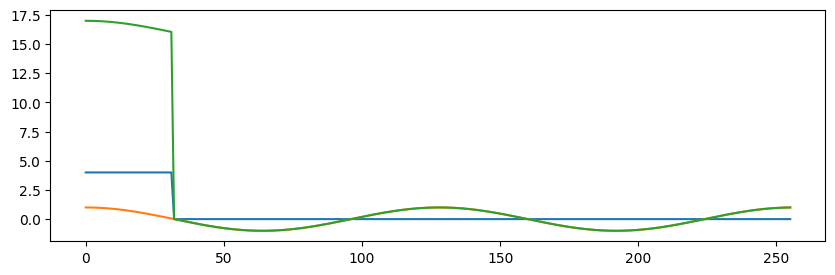

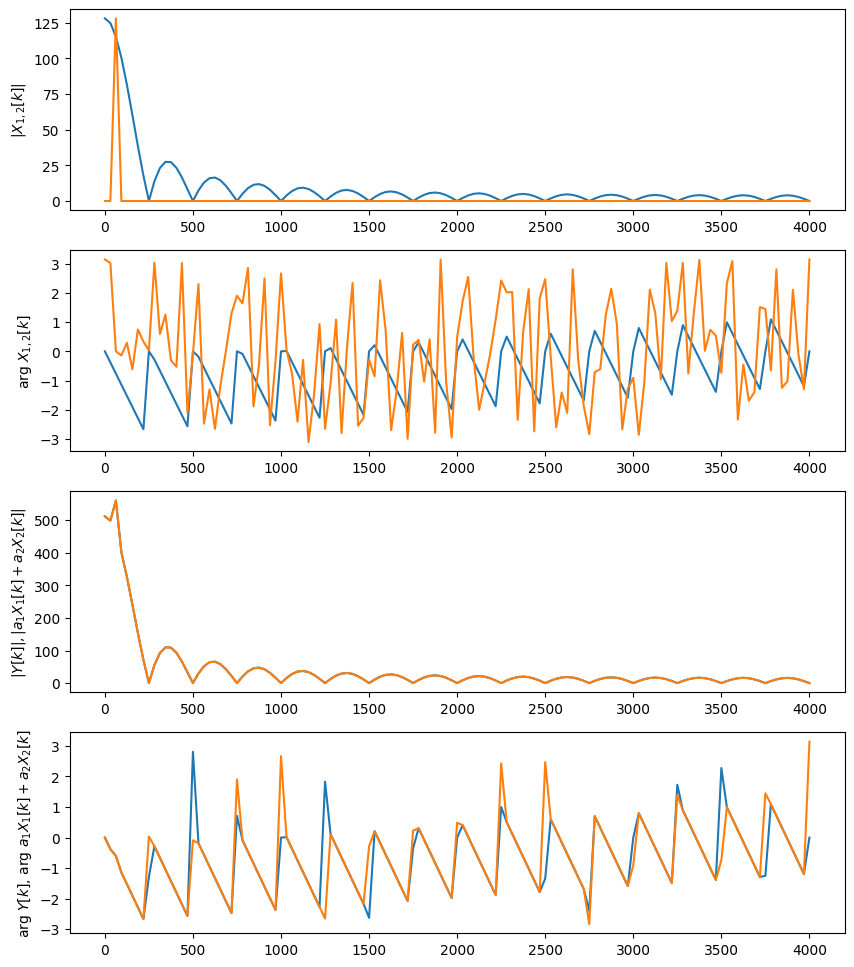

In [29]:
# >>>>>>>>>>>>>>>>> #dft_linearity <<<<<<<<<<<<<<<<<<<<<<<<<
x1 = np.zeros(N)
x1[0:32] = 4
x2 = np.cos (2 * np.pi * 2 / N * n)
a1 = 4
a2 = 1  # < ----- try to swap them to a1 = 1 and a2 = 4 ...
y = a1 * x1 + a2 * x2
X1 = np.fft.fft(x1)
X2 = np.fft.fft(x2)
Ysum = a1 * X1 + a2 * X2
Y = np.fft.fft(y)
plt.figure(figsize=(10,3))
plt.plot(n,x1)
plt.plot(n,x2)
plt.plot(n,y)

_, ax = plt.subplots(4,1, figsize=(10,12))
ax[0].plot(f,np.abs(X1[kall]))
ax[0].plot(f,np.abs(X2[kall]))
ax[0].set_ylabel('$|X_{1,2}[k]|$')
ax[1].plot(f,np.angle(X1[kall]))
ax[1].plot(f,np.angle(X2[kall]))
ax[1].set_ylabel('arg $X_{1,2}[k]$')
ax[2].plot(f,np.abs(Y[kall]))
ax[2].plot(f,np.abs(Ysum[kall]))
ax[2].set_ylabel('$|Y[k]|, |a_1X_1[k]+a_2X_2[k]|$')
ax[3].plot(f,np.angle(Y[kall]))
ax[3].plot(f,np.angle(Ysum[kall]))
ax[3].set_ylabel('arg $Y[k]$, arg $a_1X_1[k]+a_2X_2[k]$')

Text(0, 0.5, 'arg $X[k]$, arg $Y[k]$, arg $YY[k]$')

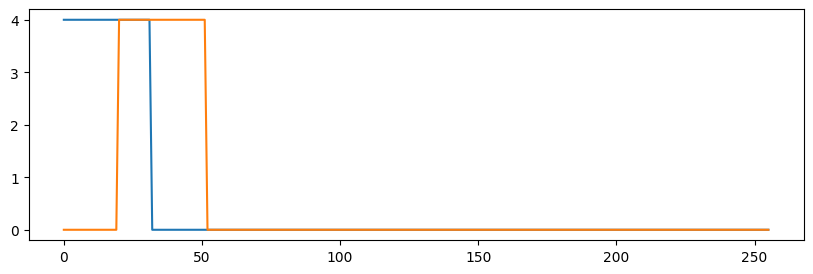

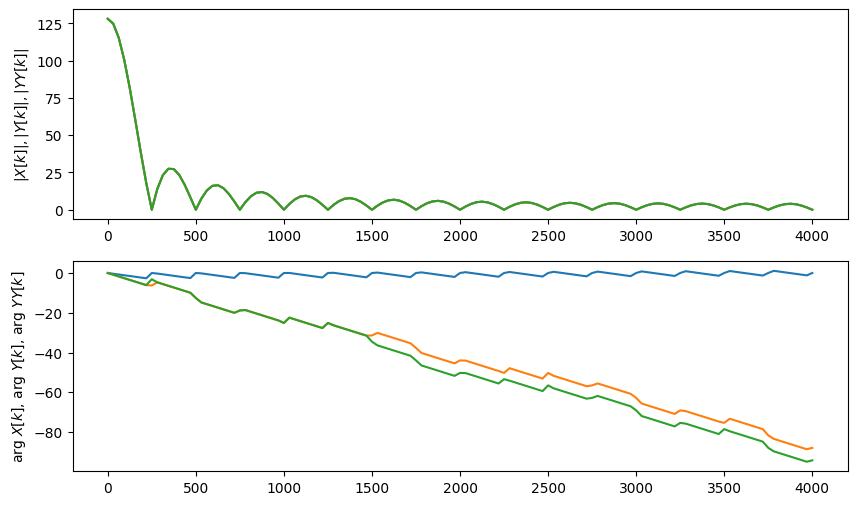

In [30]:
# >>>>>>>>>>>>>>>>> #dft_shift_linear <<<<<<<<<<<<<<<<<<<<<<<<<
x = np.zeros(N)
x[0:32] = 4
m = 20
y = np.concatenate((np.zeros(m), x[0:-m]))
X = np.fft.fft(x)
Y = np.fft.fft(y)
kfull = np.arange(N)
YY = X * np.exp(-1j * 2 * np.pi * m * kfull / N)
plt.figure(figsize=(10,3))
plt.plot(n,x)
plt.plot(n,y)

_, ax = plt.subplots(2,1, figsize=(10,6))
ax[0].plot(f,np.abs(X[kall]))
ax[0].plot(f,np.abs(Y[kall]))
ax[0].plot(f,np.abs(YY[kall]))
ax[0].set_ylabel('$|X[k]|, |Y[k]|, |YY[k]|$')
ax[1].plot(f,np.unwrap(np.angle(X[kall])))
ax[1].plot(f,np.unwrap(np.angle(Y[kall])))
ax[1].plot(f,np.unwrap(np.angle(YY[kall])))
ax[1].set_ylabel('arg $X[k]$, arg $Y[k]$, arg $YY[k]$')


Text(0, 0.5, 'arg $X[k]$, arg $Y[k]$, arg $YY[k]$')

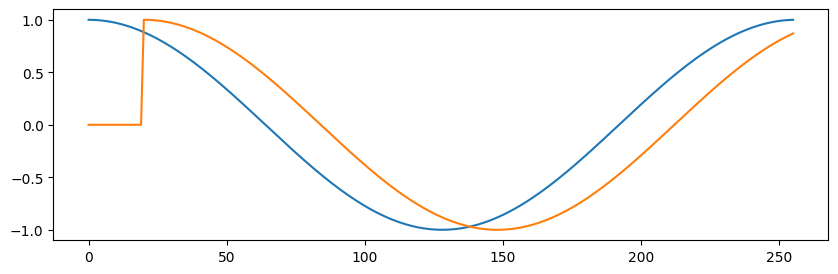

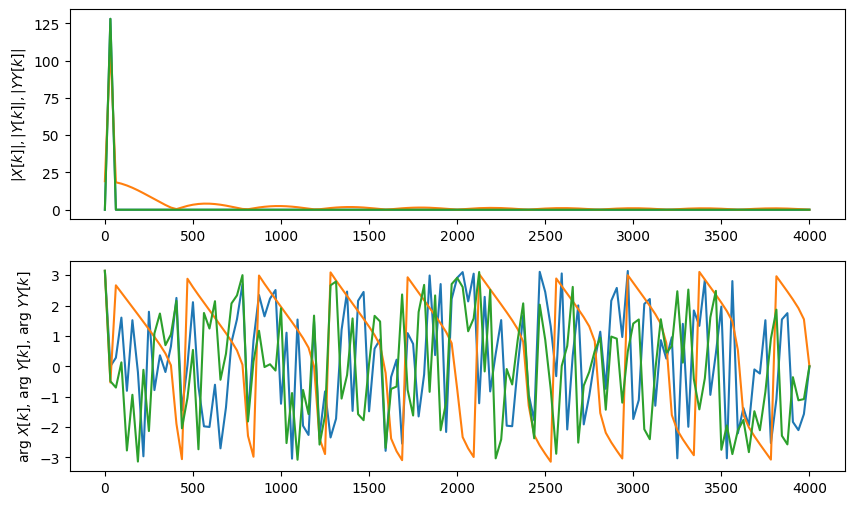

In [31]:
# >>>>>>>>>>>>>>>>> #dft_shift_linear_long <<<<<<<<<<<<<<<<<<<<<<<<<
x = np.cos(2 * np.pi * 1 / N * n)
m = 20
y = np.concatenate((np.zeros(m), x[0:-m]))
X = np.fft.fft(x)
Y = np.fft.fft(y)
kfull = np.arange(N)
YY = X * np.exp(-1j * 2 * np.pi * m * kfull / N)
plt.figure(figsize=(10,3))
plt.plot(n,x)
plt.plot(n,y)

_, ax = plt.subplots(2,1, figsize=(10,6))
ax[0].plot(f,np.abs(X[kall]))
ax[0].plot(f,np.abs(Y[kall]))
ax[0].plot(f,np.abs(YY[kall]))
ax[0].set_ylabel('$|X[k]|, |Y[k]|, |YY[k]|$')
ax[1].plot(f,np.angle(X[kall]))
ax[1].plot(f,np.angle(Y[kall]))
ax[1].plot(f,np.angle(YY[kall]))
ax[1].set_ylabel('arg $X[k]$, arg $Y[k]$, arg $YY[k]$')


Text(0, 0.5, 'arg $X[k]$, arg $Y[k]$, arg $YY[k]$')

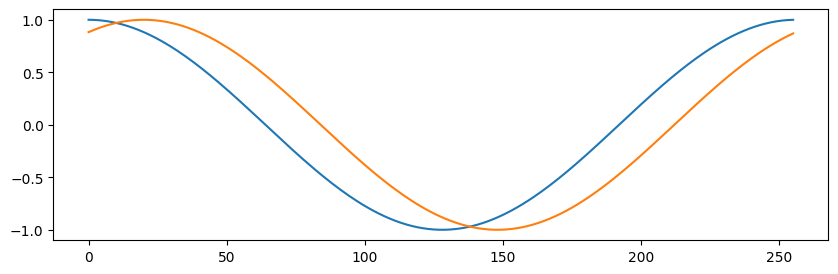

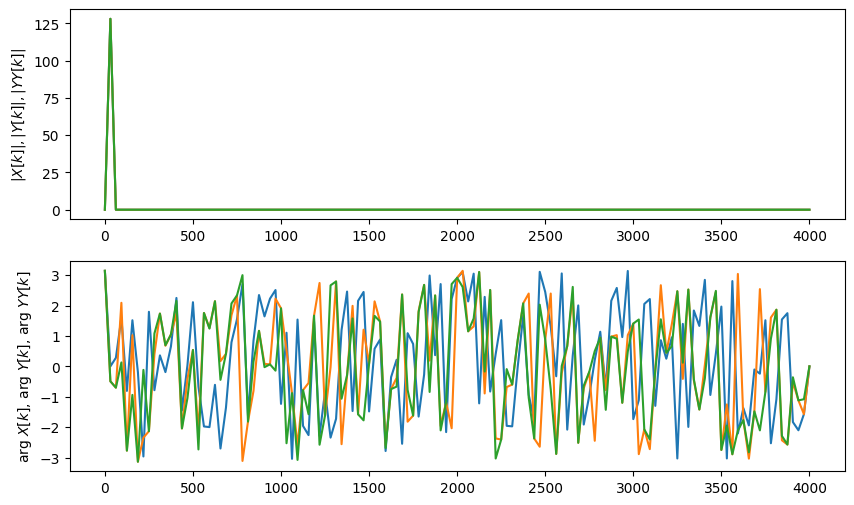

In [32]:
# >>>>>>>>>>>>>>>>> #dft_shift_circular <<<<<<<<<<<<<<<<<<<<<<<<<
x = np.cos(2 * np.pi * 1 / N * n)
m = 20
y = x[(n - m) % N]
X = np.fft.fft(x)
Y = np.fft.fft(y)
kfull = np.arange(N)
YY = X * np.exp(-1j * 2 * np.pi * m * kfull / N)
plt.figure(figsize=(10,3))
plt.plot(n,x)
plt.plot(n,y)

_, ax = plt.subplots(2,1, figsize=(10,6))
ax[0].plot(f,np.abs(X[kall]))
ax[0].plot(f,np.abs(Y[kall]))
ax[0].plot(f,np.abs(YY[kall]))
ax[0].set_ylabel('$|X[k]|, |Y[k]|, |YY[k]|$')
ax[1].plot(f,np.angle(X[kall]))
ax[1].plot(f,np.angle(Y[kall]))
ax[1].plot(f,np.angle(YY[kall]))
ax[1].set_ylabel('arg $X[k]$, arg $Y[k]$, arg $YY[k]$')


Text(0, 0.5, 'arg $X[k]$')

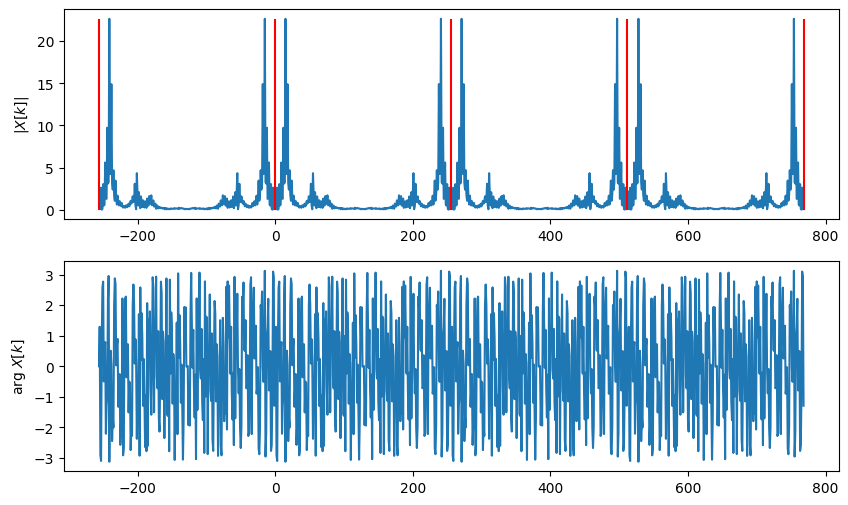

In [35]:
# >>>>>>>>>>>>>>>>> #dft_periodicity <<<<<<<<<<<<<<<<<<<<<<<<<
# better read again the signal ...
s, Fs = sf.read('prase.wav')
N = 256
n = np.arange(0,N)
x = s[1500:1500+N]

# prepare the bases - use already the minus in complex. exp.
Nhalf = int(N/2)
multiples = np.array([-1,0,1,2,3])
kall = np.arange(-N,3 * N+1)
A = np.zeros([kall.size, N],dtype=complex)   # coplex exp  bases, remember we'll have 0 ... N/2 ! dtype is required !
for k in kall:
    A[k,:] = np.exp(-1j * 2 * np.pi * k / N * n)
X = np.matmul(A, x.T)
# get the magnitude and phase of coefficients
Xmag = np.abs(X)
Xphase = np.angle(X)
_, ax = plt.subplots(2,1, figsize=(10,6))
#check ...
ax[0].plot(kall,Xmag)
ax[0].stem(multiples * N,np.ones(np.size(multiples))*np.max(np.abs(X)),basefmt=" ",linefmt="r-",markerfmt=" ") # use_line_collection="false",
ax[0].set_ylabel('$|X[k]|$')
ax[1].plot(kall,Xphase)
ax[1].set_ylabel('arg $X[k]$')


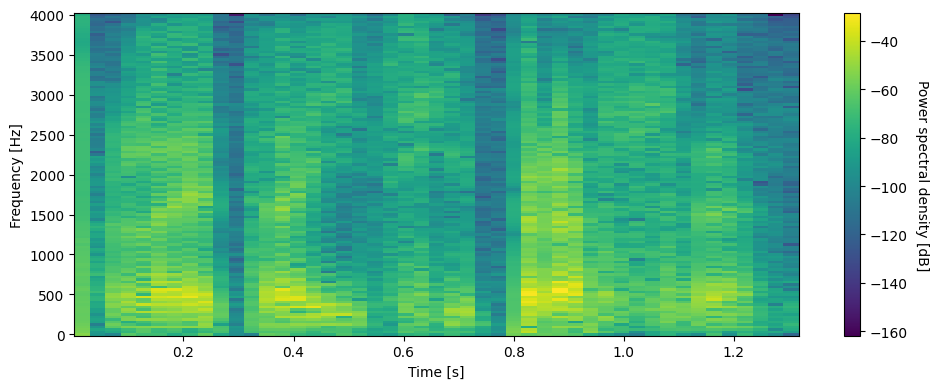

In [36]:
# >>>>>>>>>>>>>>>>> #spectrogram_blackbox <<<<<<<<<<<<<<<<<<<<<<<<<
from scipy.signal import spectrogram
f, t, sgr = spectrogram(s, Fs)
sgr_log = 10 * np.log10(sgr+1e-20)
plt.figure(figsize=(10,4))
plt.pcolormesh(t,f,sgr_log)
plt.gca().set_xlabel('Time [s]')
plt.gca().set_ylabel('Frequency [Hz]')
cbar = plt.colorbar()
cbar.set_label('Power spectral density [dB]', rotation=270, labelpad=15)
plt.tight_layout()
#print(sgr_log.shape, f.shape, t.shape)


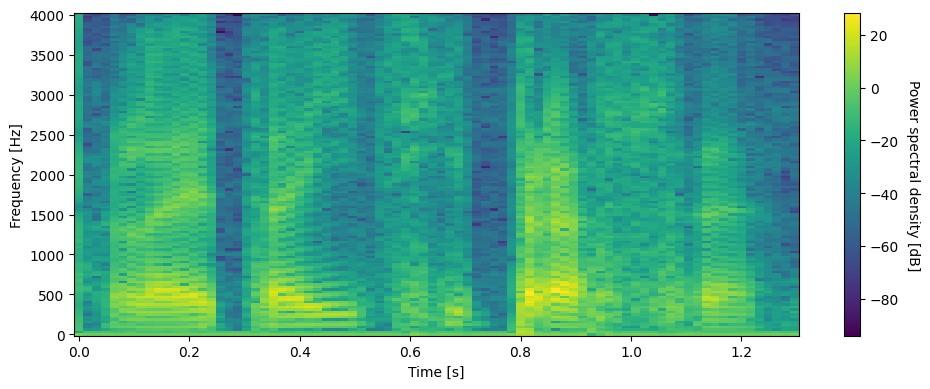

In [38]:
# >>>>>>>>>>>>>>>>> #spectrogram <<<<<<<<<<<<<<<<<<<<<<<<<
# functions taken and adapted from speech group's package "pytel", thanks Lukas Burget
import scipy as sp
import scipy.fftpack

def framing(a, frame_len, frame_shift=1):
    """division of a long signal into frames using Python array view
    a - the input signal
    frame_len - length of frame
    frame_shift - frame shift (i.e. frame lengeth minus overlap)
    """
    shape = ((a.shape[0] - frame_len) // frame_shift + 1, frame_len) + a.shape[1:]
    strides = (a.strides[0]*frame_shift,a.strides[0]) + a.strides[1:]
    return np.lib.stride_tricks.as_strided(a, shape=shape, strides=strides)

def spectrogram(x, window, noverlap=None, nfft=None):
    """spectrogram
    x - input matrix with frames
    window - vector with window or a scalar determining window size - its length determines the frame size
    noverlap - overlap of frames, if none, half of frame size
    nfft - number of FFT points, if none, equal to window size"""
    if np.isscalar(window): window = np.hamming(window)
    if noverlap is None:    noverlap = window.size // 2
    if nfft     is None:    nfft     = window.size
    x = framing(x, window.size, window.size-noverlap)
    x = scipy.fftpack.fft(x*window, nfft)
    return x[:,:x.shape[1]//2+1]  # returning only lower half of spectrum

def show_spectrogram(x, fs, nfft, frame_shift):
    """showing spectrogram
    x - spectrogram (time in rows, coeffs in rows)
    fs - sampling frequency
    nfft - number of FFT points
    frame_shit - frame shift in samples
    """
    f = np.arange(0,nfft/2 + 1) * fs / nfft
    t = np.arange(0,x.shape[0]) * shift / Fs
    sgr_log = 10 * np.log10(np.real(np.conj(X.T)*X.T+1e-20))  # transpose for visualization ...
    plt.figure(figsize=(10,4))
    #plt.pcolormesh(t,f,sgr_log,cmap="gray")
    #plt.pcolormesh(t,f,sgr_log,cmap="autumn")
    plt.pcolormesh(t,f,sgr_log)
    plt.gca().set_xlabel('Time [s]')
    plt.gca().set_ylabel('Frequency [Hz]')
    cbar = plt.colorbar()
    cbar.set_label('Power spectral density [dB]', rotation=270, labelpad=15)
    plt.tight_layout()

# compute and visualize ....
N = 256    # frame length
Nfft = 256 # number of FFT points
overlap = 128 # half of frame length
shift = N - overlap

X = spectrogram(s, N, overlap, Nfft)
show_spectrogram (X, Fs, Nfft, shift)


In [ ]:
# >>>>>>>>>>>>>>>>> #spectrogram_long_short_term <<<<<<<<<<<<<<<<<<<<<<<<<
# long term
N = 512    # frame length
Nfft = 512 # number of FFT points
overlap = 512-40 # wants 200 frames per second
shift = N - overlap

X = spectrogram(s, N, overlap, Nfft)
show_spectrogram (X, Fs, Nfft, shift)


In [ ]:
# short term
N = 40    # frame length
Nfft = 512 # number of FFT points
overlap = 0 # wants 200 frames per second
shift = N - overlap

X = spectrogram(s, N, overlap, Nfft)
show_spectrogram (X, Fs, Nfft, shift)


In [ ]:
# >>>>>>>>>>>>>>>>> #Hanning <<<<<<<<<<<<<<<<<<<<<<<<<
N = 256
Nhalf = 128
w = np.hanning(256)
howmany = 7
demo = np.zeros(N + Nhalf * (howmany - 1))
whereadd = np.arange(N)
plt.figure(figsize=(10,3))
for ii in range(howmany):
    #print(whereadd.shape,w.shape,demo.shape,whereadd)
    plt.plot(whereadd,w)
    demo[whereadd] = demo[whereadd] + w
    whereadd = whereadd + Nhalf
plt.plot(demo,linewidth = 5,color="red")


In [ ]:
# >>>>>>>>>>>>>>>>> #spectrogram_synt <<<<<<<<<<<<<<<<<<<<<<<<<
s, Fs = sf.read('prase.wav')
display(Audio(s, rate=Fs))
plt.figure(figsize=(10,3))
plt.plot(s)

# analysis
N = 256    # frame length
Nfft = 256 # number of FFT points
overlap = 128 # wants 200 frames per second
shift = N - overlap
w = np.hanning(N)
X = spectrogram(s, w, overlap, Nfft)    # we enforce the Hanning window
show_spectrogram (X, Fs, Nfft, shift)

def specgram2sig(sg, window, noverlap=None, nfft=None):
    """Reconstructs signal from spectrogram SG. WINDOW and NOVERLAP should be the
    same as the parameters passed to the function specgram while computating SG. The default
    window is rectangular (all 1's). When the spectrum is modified, it's safer to use sqrt(hanning)
    both for analysis and for synthesis.
    Example:
    s = load ...
    X = specgram(s, hanning(256), 128, 256);
    xs = specgram2sig(X, 256, 128, 256);
    Without spectrogram modification, signal xs should be almost identical to s.
    See also spectrogram.
    """
    window = np.array(window).ravel()
    winlen = len(window)
    if winlen == 1:
        winlen = window;
        window = 1.0;
    if noverlap is None: noverlap = winlen // 2
    if nfft     is None: nfft     = winlen
    sig=np.zeros(len(sg)*(winlen-noverlap)+noverlap)
    for ii, spec in enumerate(sg):
        frmSig = np.real(scipy.fftpack.ifft(np.r_[spec, np.conjugate(spec[(nfft-1)//2:0:-1])], nfft))
        frmStrt = ii * (winlen-noverlap);
        sig[frmStrt:frmStrt+winlen] = sig[frmStrt:frmStrt+winlen] + frmSig[:winlen] * window;
    return sig

# synthesis
xs = specgram2sig(X, np.ones(N), overlap, Nfft)
plt.figure(figsize=(10,3))
plt.plot(s)
plt.plot(xs)
# zoom
nselect=range(1500,2500)
plt.figure(figsize=(10,3))
plt.plot(s[nselect])
plt.plot(xs[nselect])
display(Audio(xs, rate=Fs))


In [ ]:
# >>>>>>>>>>>>>>>>> #spectrogram_filtering <<<<<<<<<<<<<<<<<<<<<<<<<
w = np.sqrt(np.hanning(N))
X = spectrogram(s, w, overlap, Nfft)    # we enforce the sqrt Hanning window
show_spectrogram (X, Fs, Nfft, shift)

# take out some  frequency range ...
Flow=1000
Fhigh=2000
kkill = range(int(Flow / Fs * Nfft), int(Fhigh / Fs * Nfft)+1)
XX = X
XX[:,kkill] = 0
show_spectrogram (XX, Fs, Nfft, shift)

# synthesize, show and play
xs = specgram2sig(XX, w, overlap, Nfft)
plt.figure(figsize=(10,3))
plt.plot(s)
plt.plot(xs)
# zoom
nselect=range(1500,2500)
plt.figure(figsize=(10,3))
plt.plot(s[nselect])
plt.plot(xs[nselect])
display(Audio(s, rate=Fs))
display(Audio(xs, rate=Fs))


In [ ]:
# >>>>>>>>>>>>>>>>> #spectrogram_duration_modif <<<<<<<<<<<<<<<<<<<<<<<<<
w = np.sqrt(np.hanning(N))
X = spectrogram(s, w, overlap, Nfft)    # we enforce the sqrt Hanning window

Xshort = X[0:-1:2,:]
xshort = specgram2sig(Xshort, w, overlap, Nfft)
Xlong = np.repeat(X, repeats=2, axis=0)
xlong = specgram2sig(Xlong, w, overlap, Nfft)
display(Audio(s, rate=Fs))
display(Audio(xshort, rate=Fs))
display(Audio(xlong, rate=Fs))
